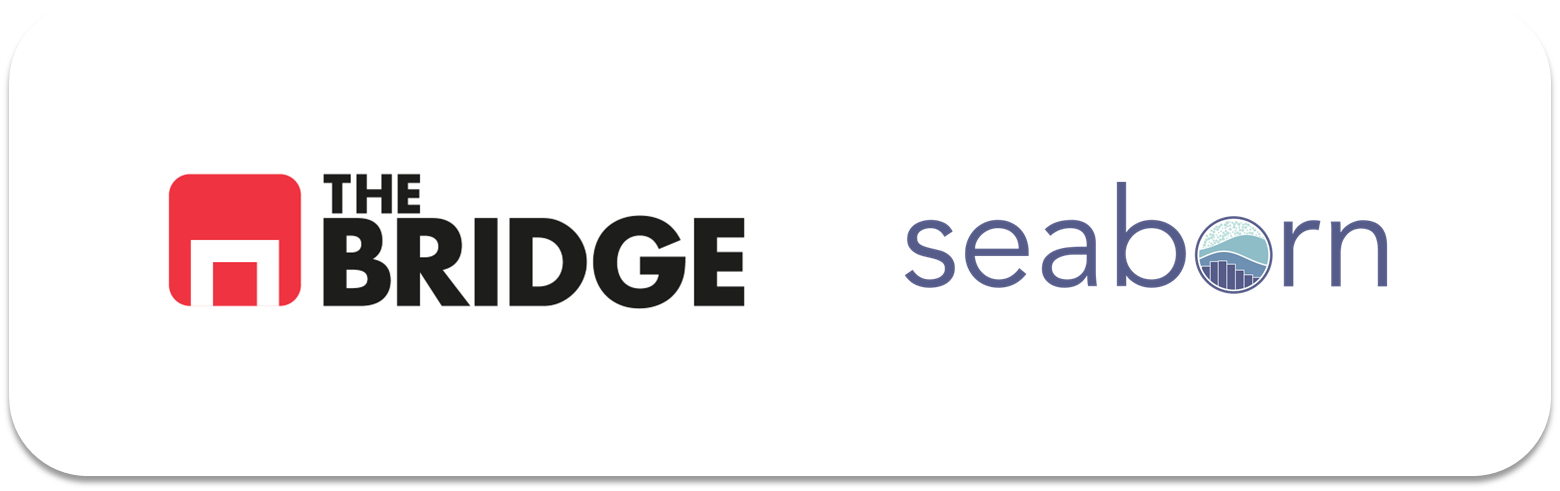

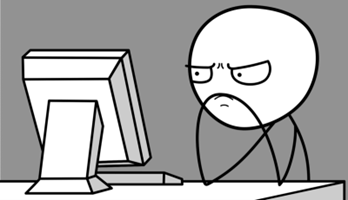

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [3]:
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"])
df_bitcoin.set_index("fechas", inplace = True)
df_bitcoin.drop("date",axis = 1, inplace = True)
df_bitcoin.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [4]:

def plot_categorical_frequencies(df, categorical_columns):
    """
    Creates a matrix of bar plots showing absolute frequencies for categorical columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the data to analyze
    categorical_columns : list
        List of column names to plot (assumed to be categorical)
        
    Returns:
    --------
    None (displays the plots)
    """
    
    # Calculate number of rows needed (2 columns fixed)
    n_cols = 2
    n_rows = int(np.ceil(len(categorical_columns) / n_cols))
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    
    # Flatten axes array for easier iteration
    axes = axes.flatten() if n_rows > 1 else [axes] if len(categorical_columns) == 1 else axes
    
    # Create bar plots for each categorical column
    for idx, column in enumerate(categorical_columns):
        # Calculate value counts (absolute frequencies)
        frequencies = df[column].value_counts()
        
        # Create bar plot using seaborn
        sns.barplot(x=frequencies.index, y=frequencies.values, ax=axes[idx])
        
        # Customize the plot
        axes[idx].set_title(f'Frecuencias Absolutas de {column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Frecuencia')
        
        # Rotate x-labels if there are many categories
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if number of columns is odd
    for idx in range(len(categorical_columns), len(axes)):
        axes[idx].set_visible(False)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


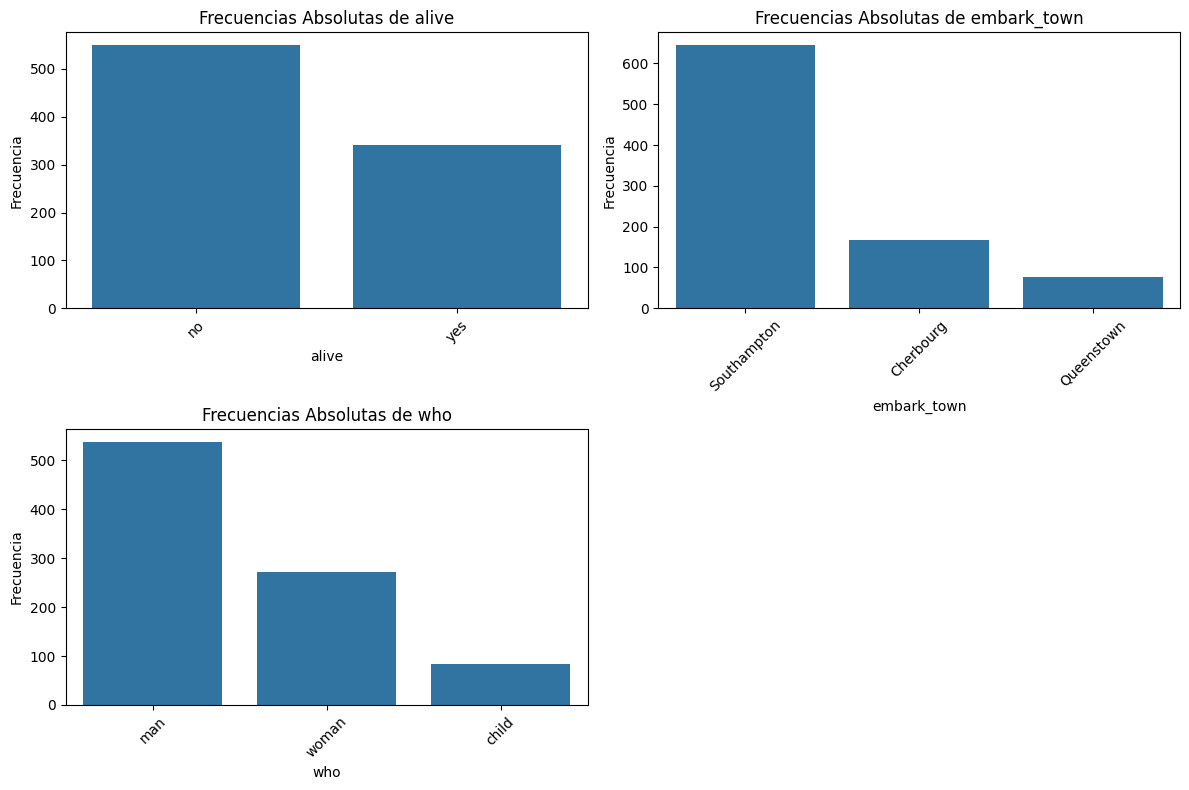

In [8]:
col_titanic = ["alive", "embark_town", "who"]
plot_categorical_frequencies(df_titanic, col_titanic)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [9]:
def plot_numerical_histograms(df, numerical_columns, n_bins=30, show_density=False):
    """
    Creates a matrix of histograms for numerical columns with optional density curves.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the data to analyze
    numerical_columns : list
        List of column names to plot (assumed to be numerical)
    n_bins : int, default=30
        Number of bins to use in the histograms
    show_density : bool, default=False
        If True, adds a kernel density estimation curve to each histogram
        
    Returns:
    --------
    None (displays the plots)
    """
    
    # Calculate layout dimensions
    n_cols = 2  # Fixed number of columns
    n_rows = int(np.ceil(len(numerical_columns) / n_cols))
    
    # Create figure with subplots
    # Make figure height proportional to number of rows for better visibility
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    
    # Handle different cases of axes array dimensionality
    if n_rows == 1 and len(numerical_columns) == 1:
        axes = [axes]  # Single plot case
    elif n_rows == 1:
        axes = [axes[0], axes[1]]  # One row case
    else:
        axes = axes.flatten()  # Multiple rows case
    
    # Create histograms for each numerical column
    for idx, column in enumerate(numerical_columns):
        # Create histogram with density curve if requested
        sns.histplot(
            data=df,
            x=column,
            bins=n_bins,
            kde=show_density,  # Show density curve if requested
            ax=axes[idx]
        )
        
        # Customize the plot
        axes[idx].set_title(f'Distribución de {column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Frecuencia' if not show_density else 'Densidad')
        
        # Add grid for better readability
        axes[idx].grid(True, alpha=0.3)
        
    # Hide empty subplots if number of columns is odd
    for idx in range(len(numerical_columns), len(axes)):
        axes[idx].set_visible(False)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

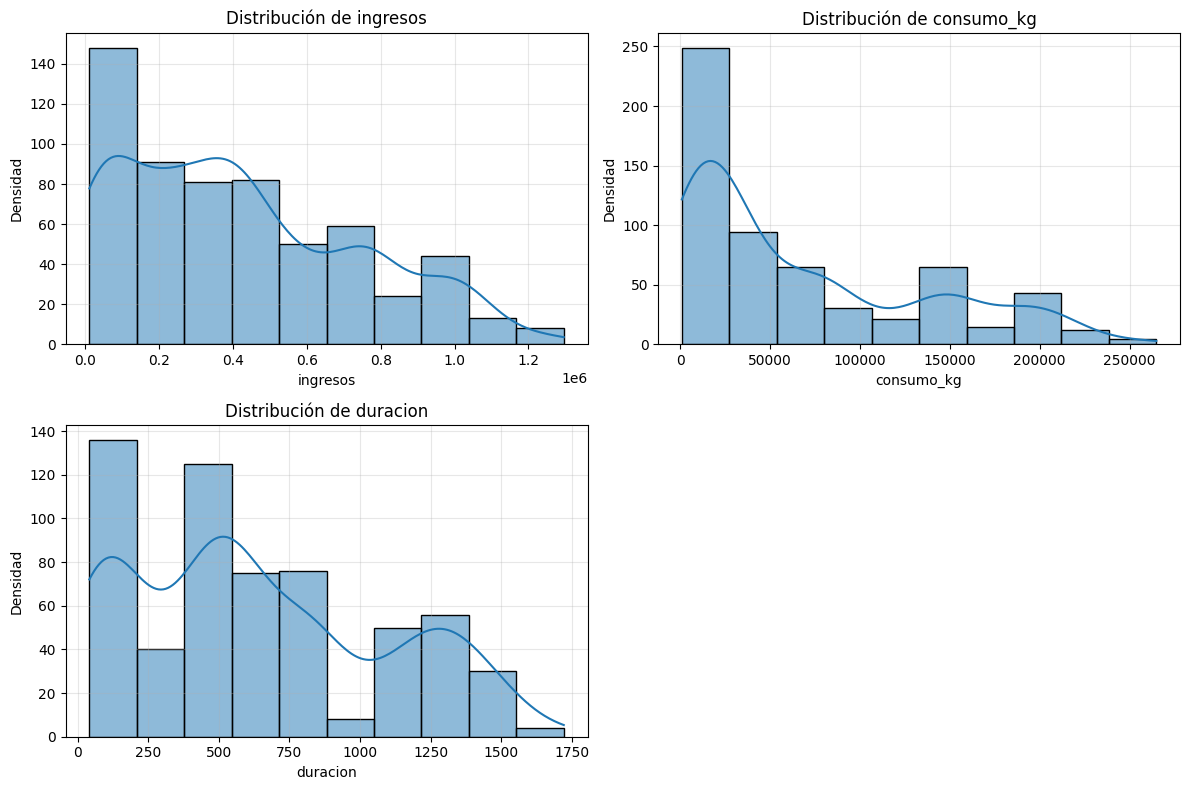

In [11]:
plot_numerical_histograms(
    df=df_viajes,
    numerical_columns=['ingresos', 'consumo_kg', 'duracion'],
    n_bins=10,
    show_density=True
)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [12]:

def plot_time_series(df, numerical_columns):
    """
    Creates a matrix of line plots for numerical columns representing time series or sequences.
    Each column is plotted against its index, making it ideal for temporal or sequential data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the time series data
    numerical_columns : list
        List of column names to plot (assumed to be numerical sequences)
        
    Returns:
    --------
    None (displays the plots)
    """
    
    # Calculate the required number of rows for a 2-column layout
    n_cols = 2
    n_rows = int(np.ceil(len(numerical_columns) / n_cols))
    
    # Create a figure with appropriate size
    # We multiply the base height by number of rows to maintain consistent subplot sizes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
    
    # Handle different cases of axes dimensionality for proper iteration
    if n_rows == 1 and len(numerical_columns) == 1:
        axes = [axes]  # Single plot case
    elif n_rows == 1:
        axes = [axes[0], axes[1]]  # One row case
    else:
        axes = axes.flatten()  # Multiple rows case
    
    # Create line plots for each numerical column
    for idx, column in enumerate(numerical_columns):
        # Plot the time series using seaborn's lineplot
        # We use the dataframe index as the x-axis
        sns.lineplot(
            data=df,
            y=column,
            x=df.index,
            ax=axes[idx]
        )
        
        # Enhance the plot with additional formatting
        axes[idx].set_title(f'Serie temporal de {column}')
        axes[idx].set_xlabel('Índice')
        axes[idx].set_ylabel(column)
        
        # Add grid for better readability of trends
        axes[idx].grid(True, alpha=0.3)
        
        # Rotate x-axis labels if they're too crowded
        axes[idx].tick_params(axis='x', rotation=45)
        
    # Hide any empty subplots in the last row if we have an odd number of columns
    for idx in range(len(numerical_columns), len(axes)):
        axes[idx].set_visible(False)
    
    # Adjust the layout to prevent overlap between subplots
    plt.tight_layout()
    
    # Display the plot

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

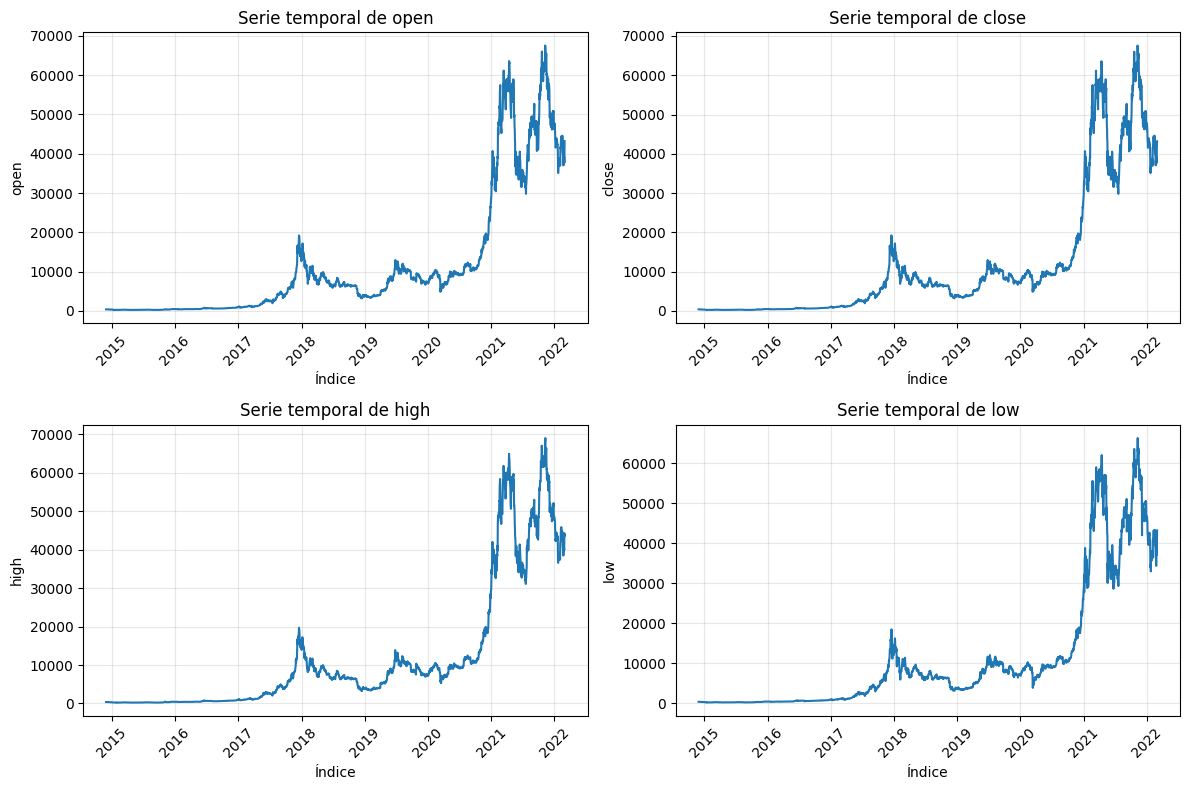

In [13]:

plot_time_series(df_bitcoin, ['open', 'close', 'high', 'low'])


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [14]:
def plot_time_series(df, numerical_columns, combine_plots=False, start_date=None, end_date=None):
    """
    Creates visualizations for multiple time series with options for combined view and date filtering.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the time series data with datetime index
    numerical_columns : list
        List of column names to plot (assumed to be numerical sequences)
    combine_plots : bool, default=False
        If True, creates a single plot with all series together
        If False, creates a matrix of individual plots
    start_date : str or datetime, optional
        Start date for filtering the time series
        Must be in a format compatible with pandas datetime
    end_date : str or datetime, optional
        End date for filtering the time series
        Must be in a format compatible with pandas datetime
        
    Returns:
    --------
    None (displays the plots)
    """
    
    # Create a copy of the dataframe to avoid modifying the original
    plot_df = df.copy()
    
    # Filter the date range if specified
    if start_date is not None:
        plot_df = plot_df[plot_df.index >= pd.to_datetime(start_date)]
    if end_date is not None:
        plot_df = plot_df[plot_df.index <= pd.to_datetime(end_date)]
    
    if combine_plots:
        # Create a single figure with all time series
        plt.figure(figsize=(12, 6))
        
        # Plot each series on the same axes
        for column in numerical_columns:
            sns.lineplot(
                data=plot_df,
                y=column,
                x=plot_df.index,
                label=column
            )
        
        # Enhance the combined plot
        plt.title('Series Temporales Combinadas')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.grid(True, alpha=0.3)
        plt.legend(title='Variables')
        plt.xticks(rotation=45)
        
    else:
        # Calculate the required number of rows for a 2-column layout
        n_cols = 2
        n_rows = int(np.ceil(len(numerical_columns) / n_cols))
        
        # Create a figure with appropriate size
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
        
        # Handle different cases of axes dimensionality
        if n_rows == 1 and len(numerical_columns) == 1:
            axes = [axes]  # Single plot case
        elif n_rows == 1:
            axes = [axes[0], axes[1]]  # One row case
        else:
            axes = axes.flatten()  # Multiple rows case
        
        # Create individual line plots for each numerical column
        for idx, column in enumerate(numerical_columns):
            # Plot the time series using seaborn's lineplot
            sns.lineplot(
                data=plot_df,
                y=column,
                x=plot_df.index,
                ax=axes[idx]
            )
            
            # Enhance each individual plot
            axes[idx].set_title(f'Serie temporal de {column}')
            axes[idx].set_xlabel('Fecha')
            axes[idx].set_ylabel(column)
            axes[idx].grid(True, alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45)
            
        # Hide empty subplots if present
        for idx in range(len(numerical_columns), len(axes)):
            axes[idx].set_visible(False)
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()


### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.